# 📚 3.3 相恋篇-图像数据处理

图像处理是指图像在神经网络训练之前的预处理，是人工智能视觉领域的重要组成部分。通过图像处理技术对图像数据集进行处理有两方面的作用：（1）将原始数据集处理成合格的、规范是数据集；（2）通过图像处理技术实现对原始数据集的增广。

## 一、本节目标
        本节将详述概述常用的图像处理技术如图像裁剪、尺寸调整、图像旋转、图像色彩变化等。

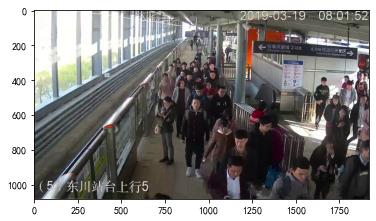

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 图像读取
image_path = 'tf_image/3565.jpg'
image = tf.io.read_file(image_path)
image_decode = tf.image.decode_image(image, channels=3)
#显示图像
plt.imshow(image_decode)
plt.show()

### 2.1 图像放缩
     图像放缩是指保持图像的内容不变，对图像的尺寸进行调整，将图像的长和宽按照对应的比例进行变化。Tensorflow中提供的图像放缩函数如下：

**tf.image.resize**(  
    images,  
    size,  
    method,  
    preserve_aspect_ratio,  
    antialias=False,  
    name=None  
)

参数介绍如下:

<img src="https://tianchi-public.oss-cn-hangzhou.aliyuncs.com/public/files/forum/161598438412846491615984383002.png"/>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


before resize iamge hight:1080, width:1920, channels:3
after resize image hight:618, width:618, channels:3


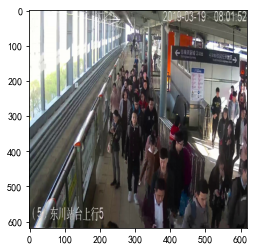

In [11]:
# 获取图像尺寸信息
h, w, c = image_decode.shape
print('before resize iamge hight:{}, width:{}, channels:{}'.format(h, w, c))
# 图像放缩
image_resize = tf.image.resize(
    image_decode,
    (618, 618),
    method='area',
)
# 获取图像尺寸信息
h, w, c = image_resize.shape
print('after resize image hight:{}, width:{}, channels:{}'.format(h, w ,c))
# 显示图像
image_resize = image_resize/255
plt.imshow(image_resize)
plt.show()

### 2.2 图像翻转
图像旋转是指图像左右或上下对称翻转。tensorflow中针对上下和左右翻转提供了不同的方法。

<img src="https://tianchi-public.oss-cn-hangzhou.aliyuncs.com/public/files/forum/161598451774488521615984516512.png"/>

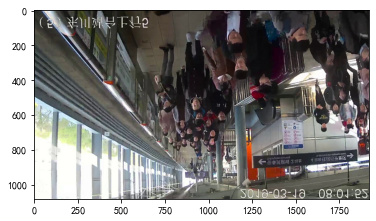

In [10]:
# 上下翻转
image_flip = tf.image.flip_up_down(image_decode)
plt.imshow(image_flip)
plt.show()

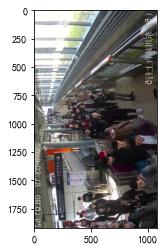

In [12]:
# 对角线翻转
image_tans = tf.image.transpose(image_decode)
plt.imshow(image_tans)
plt.show()

### 2.3 图像旋转
tensorflow在图像旋转方面的函数还不够完善，目前，只提供了一个函数，但该函数不能实现图像旋转任意角度，只能旋转90、180、270、360度，是通过旋转次数来控制的，该函数如下：  
tf.image.rot90(image，k)  
参数：  
image:  图像tensor;  
k: 旋转次数，图像逆时针旋转（k*90)度  

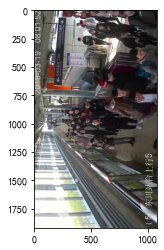

In [13]:
# 图像旋转
image_rot = tf.image.rot90(image_decode, 1)
plt.imshow(image_rot)
plt.show()

### 2.4 图像色彩调整
颜色是目标的重要特征，同一种颜色对亮度、对比度、饱和度等进行调整不但不会影响推理的结果，反而会增加模型的泛化能力。tensorflow提供了相关颜色调整的函数。

<img src="https://tianchi-public.oss-cn-hangzhou.aliyuncs.com/public/files/forum/161598456769579641615984566489.png"/>

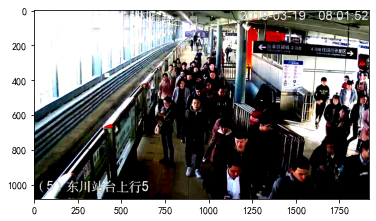

In [16]:
# 对比度调整
image_contrast = tf.image.adjust_contrast(image_decode, 3)
plt.imshow(image_contrast)
plt.show()

## 三、 图像处理建议
图像处理是提升数据集质量和增加样本多样性的基础，同时，图像处理的方法多种多样，tensorflow的image模块为大家提供了大量的图像处理函数，在此不一一列举如何使用，希望大家参照官网文档对相关函数进行学习。